# Bach AI Datasets Analysis

AIs need data to train on. While models can be trained on the same data, the models that I am using for my project have been trained on a variety of different datasets that all convey information about notes, chords, keys, and more in Bach chorales. This report aims to analyze/visualize the information contained inside these datasets as well as communicate the strengths and weaknesses of each of the datasets. 

## Overview of the Datasets

There are three main datasets that my models/research draw from:

* **Bach-Chorale-Harmony**: This dataset contains columns for each pitch class with a `True` value if that pitch class is present in the chord and `False` if the pitch class is not present in the chord. Also contains information about the bass, meter, and chord name. 
* **Bach-Chorales**: This dataset contains information about the melody (soprano) lines in Bach chorales. Contains information about the duration the note was held for, the key and time signature, and whether there is a fermata on the note.
* **JSB-Chorales**: This dataset contains information about the notes that are being sung by all 4 parts. I also added information about what chord is being played using the `music21` package.

## Loading All the Datasets

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bach_chorale_harmony_df = pd.read_csv('./Bach-Chorale-Harmony/Bach-Chorale-Harmony.csv')
bach_chorales_df = pd.read_csv('./Bach-Chorales/chorales.csv')
jsb_chorales_df = pd.read_csv('./JSB-Chorales/JSB-Chorales.csv')

## General Information About All Datasets

Before I go into detail about the features of each dataset, I want to start by comparing the difference between these datasets. 

For starters, we can get information about the number of timesteps taken into consideration within each of these datasets by just getting the length of each dataset;

In [2]:
print('Number of timesteps in the Bach-Chorale-Harmony dataset:', len(bach_chorale_harmony_df.index))
print('Number of timesteps in the Bach-Chorales dataset:', len(bach_chorales_df.index))
print('Number of timesteps in the JSB-Chorales dataset:', len(jsb_chorales_df.index))

Number of timesteps in the Bach-Chorale-Harmony dataset: 5665
Number of timesteps in the Bach-Chorales dataset: 4693
Number of timesteps in the JSB-Chorales dataset: 92536


More data present in a dataset means that the resulting model will be more accurate, so the JSB-Chorales dataset takes the cake for most data present in its dataset. Although this is incredibly ironic because this was the dataset used by Coconet - the model that performs the worst out of all the models I looked at in this project.

Also something that is important is the number of chorales that are present at all within the dataset. The following graph contains this information:

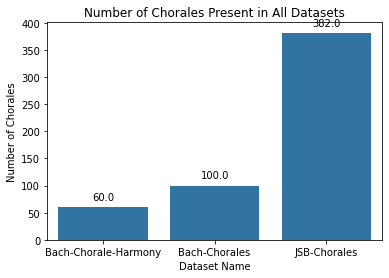

In [12]:
num_chorales = {'Bach-Chorale-Harmony':(len(set(bach_chorale_harmony_df['ChoraleID'].values))), 
                'Bach-Chorales':(len(set(bach_chorales_df['chorale_id'].values))), 
                'JSB-Chorales':(len(set(jsb_chorales_df['ChoraleID'].values)))}

ax = sns.barplot(num_chorales)

# Annotate the values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Dataset Name')
plt.ylabel('Number of Chorales')
plt.title('Number of Chorales Present in All Datasets')
plt.show()

This is also something that is important to note. Bach wrote approximately 400 chorales (although scholars have been disagreeing on this - sometimes the number 371 is thrown out there). Either way, JSB-Chorales covers a majority of all chorales that Bach wrote, which helps in providing rigorous data. On the other hand, these other datasets use way fewer of the chorales. This gives the AI less time to prepare against the variety of style that Bach writes with. Hopefully the style is covered in this representation.

The final item I wanted to measure is to plot the percentage of types of chords that are present in all these datasets. The Bach-Chorales dataset can't be included in this, as it only contains information about the melody line in Bach chorales. However, the other two datasets have information about all the voices and therefore information about the chords. The percentage of kinds of chords is labeled below (both as a barplot and side-by-side pie charts because I wanted practice writing them both):